<a href="https://colab.research.google.com/github/aprilialiaa/DAMC-Oct_Games-Analysis/blob/main/DAMCOktGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# read data from google sheet

pd.reset_option('^display.', silent=True)

sheet_url = 'https://docs.google.com/spreadsheets/d/10poofg-l8DMdtUgGy8mOpra2IHmA9EQC7drmF9AyYHA/edit#gid=1485085913'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
df

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...
172,Who Wants to Be a Millionaire?,1.0,NaN,11/1/1999,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,12/1/1994,Space combat simulation,Origin Systems,Electronic Arts
174,Zoo Tycoon,1.0,Zoo Tycoon,10/1/2001,Business simulation,Microsoft,Blue Fang Games
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,3/1/2013,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [39]:
#check the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [40]:
#just to get the list of the columns

df.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

In [41]:
#check the value counts

for col_name in ['Name', 'Series', 'Release', 'Genre', 'Developer','Publisher']:
  print(df[col_name].value_counts(), '\n')

StarCraft II: Heart of the Swarm    2
StarCraft II: Legacy of the Void    2
PlayerUnknown's Battlegrounds       1
Duke Nukem 3D                       1
Crysis Warhead                      1
                                   ..
Battlefield 1942                    1
Black & White                       1
Civilization III                    1
Cossacks II: Napoleonic Wars        1
Zoo Tycoon                          1
Name: Name, Length: 175, dtype: int64 

StarCraft                6
Command & Conquer        5
Civilization             4
Age of Empires           4
Warcraft                 3
                        ..
Alice                    1
Ark: Survival Evolved    1
BioShock                 1
Commandos                1
Zoo Tycoon               1
Name: Series, Length: 91, dtype: int64 

3/1/2013     4
3/1/2004     4
2/1/2016     3
11/1/2004    3
9/1/2004     3
            ..
9/1/2000     1
12/1/1998    1
9/1/1998     1
9/1/1999     1
12/1/1994    1
Name: Release, Length: 130, dtype: int6

In [76]:
#check the duplicated rows and remove them if any

df.duplicated(subset=['Name'])
df = df.drop_duplicates(['Name'])
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [77]:
#change the type of ['Release'] column to datetime

df['Release'] =  pd.to_datetime(df['Release'])
df['Release'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0   2017-12-01
1   2011-11-01
2   2012-05-01
3   2006-11-01
4   2011-05-01
Name: Release, dtype: datetime64[ns]

In [78]:
#get the year of the release to make it simpler

df['Year'] = df['Release'].dt.strftime('%Y')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Sales,Series,Release,Genre,Developer,Publisher,Year
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton,2017
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios,2011
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,2012
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve,2006
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic,2011


In [79]:
#fill the Null in the Series column

df['Series'] = df['Series'].fillna('No Series Specified')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Sales,Series,Release,Genre,Developer,Publisher,Year
0,PlayerUnknown's Battlegrounds,42.0,No Series Specified,2017-12-01,Battle royale,PUBG Studios,Krafton,2017
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios,2011
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,2012
3,Garry's Mod,20.0,No Series Specified,2006-11-01,Sandbox,Facepunch Studios,Valve,2006
4,Terraria,17.2,No Series Specified,2011-05-01,Action-adventure,Re-Logic,Re-Logic,2011


In [46]:
#agg_payment = df_replaced.groupby('Payment', as_index=False).agg({'Revenue':'sum', 'Invoice ID': 'nunique'})
agg_name = df.groupby('Year', as_index=False).agg({'Name':'nunique'})
agg_name.head()

,Year,Name
0,1984,1
1,1985,2
2,1988,3
3,1989,1
4,1993,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Games')

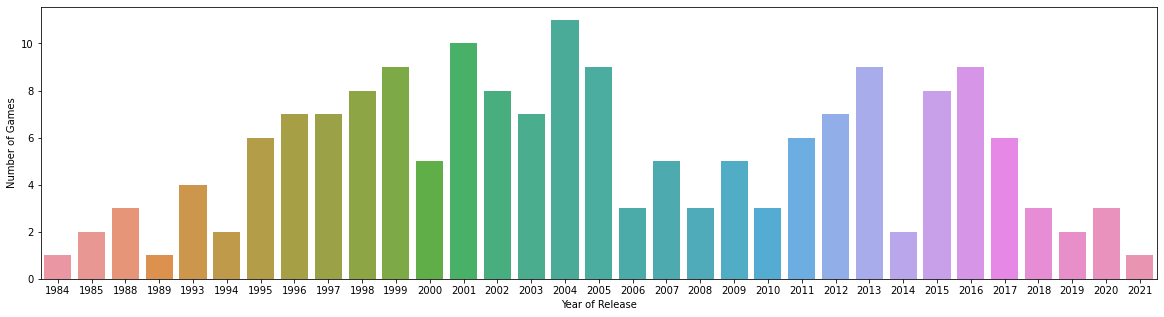

In [47]:
#get the chart of the Number of Games released every year

plt.rcParams["figure.figsize"] = (20,5)
numberbyrelease = sns.barplot('Year', 'Name', data =agg_name)
numberbyrelease.set_xlabel("Year of Release")
numberbyrelease.set_ylabel("Number of Games")

In [48]:
#count the number of games for every genre

df['Genre'].value_counts()

Real-time strategy                        24
First-person shooter                      19
Action role-playing                       12
Construction and management simulation     9
Role-playing game                          8
                                          ..
Action role-playing game                   1
Maze, arcade                               1
Action-adventure, platformer               1
Action-adventure, Survival                 1
Space combat simulation                    1
Name: Genre, Length: 61, dtype: int64

In [80]:
#turns out that the genre is listed multiple in a column
#decided to take the first mentioned genre as the main genre

main_genre=pd.DataFrame()
main_genre=df['Genre'].str.split(',',expand=True)
main_genre.rename(columns={main_genre.columns[0]: "Main Genre" }, inplace=True)
#print(main_genre)
#main_genre[0].value_counts()
df=pd.concat([df,main_genre['Main Genre']], axis=1)
print(df)

                                     Name  Sales               Series  \
0           PlayerUnknown's Battlegrounds   42.0  No Series Specified   
1                               Minecraft   33.0            Minecraft   
2                              Diablo III   20.0               Diablo   
3                             Garry's Mod   20.0  No Series Specified   
4                                Terraria   17.2  No Series Specified   
..                                    ...    ...                  ...   
170                              Vietcong    1.0             Vietcong   
171    Warhammer Online: Age of Reckoning    1.0            Warhammer   
172        Who Wants to Be a Millionaire?    1.0  No Series Specified   
173  Wing Commander 3: Heart of the Tiger    1.0       Wing Commander   
174                            Zoo Tycoon    1.0           Zoo Tycoon   

       Release                    Genre               Developer  \
0   2017-12-01            Battle royale            PUBG 

In [50]:
#count the number of games for every main genre 

df_main_genre = pd.DataFrame(df['Main Genre'].value_counts()).reset_index().rename(columns={'index':'Genre', 'Main Genre':'Number of Games'})
df_main_genre = df_main_genre.head(10)
print(df_main_genre)

                                    Genre  Number of Games
0                      Real-time strategy               25
1                    First-person shooter               19
2                     Action role-playing               13
3                        Action-adventure               10
4  Construction and management simulation                9
5                       Role-playing game                8
6                                  MMORPG                6
7                           City-building                6
8                                Survival                5
9                     Turn-based strategy                5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


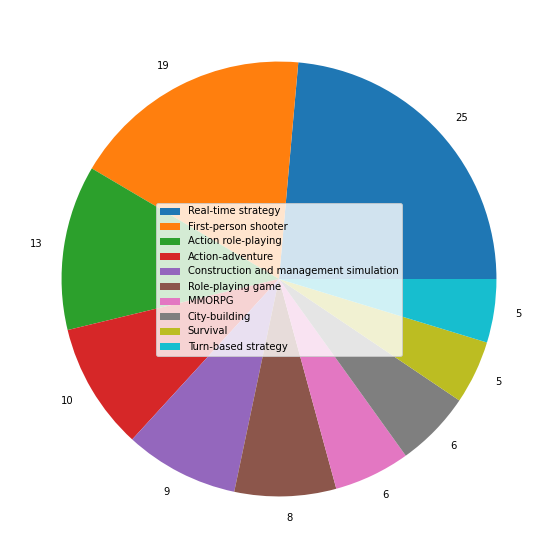

In [70]:
#get the chart for the genre (take top 10)

plt.pie(np.array([df_main_genre['Number of Games']]),
        labels=(df_main_genre['Number of Games'])
        )
plt.legend(df_main_genre['Genre'],loc='center')
plt.show()

In [81]:
#view top 10 sales

Sales_10 = df.sort_values(by=['Sales'], ascending=False).head(10)
Sales_10

,Name,Sales,Series,Release,Genre,Developer,Publisher,Year,Main Genre
0,PlayerUnknown's Battlegrounds,42.0,No Series Specified,2017-12-01,Battle royale,PUBG Studios,Krafton,2017,Battle royale
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios,2011,Sandbox
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,2012,Action role-playing
3,Garry's Mod,20.0,No Series Specified,2006-11-01,Sandbox,Facepunch Studios,Valve,2006,Sandbox
4,Terraria,17.2,No Series Specified,2011-05-01,Action-adventure,Re-Logic,Re-Logic,2011,Action-adventure
5,World of Warcraft,14.0,Warcraft,2004-11-01,MMORPG,Blizzard Entertainment,Blizzard Entertainment,2004,MMORPG
6,Half-Life 2,12.0,Half-Life,2004-11-01,First-person shooter,Valve,Valve (digital),2004,First-person shooter
7,The Witcher 3: Wild Hunt,12.0,The Witcher,2015-05-01,Action role-playing,CD Projekt Red,CD Projekt,2015,Action role-playing
8,StarCraft,11.0,StarCraft,1998-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment,1998,Real-time strategy
9,The Sims,11.0,The Sims,2000-02-01,Life simulation,Maxis,Electronic Arts,2000,Life simulation


In [53]:
#get top 10 developers

val_dev = df['Developer'].value_counts()
df_dev = pd.DataFrame(val_dev).reset_index().rename(columns={'index':'Top Developer', 'Developer':'Number of Games'})
dev10 = df_dev.head(10)
print(dev10)

                Top Developer  Number of Games
0      Blizzard Entertainment                8
1                       Maxis                6
2  Paradox Development Studio                5
3                 id Software                4
4            Westwood Studios                4
5                      Capcom                4
6            Ensemble Studios                4
7              CD Projekt Red                4
8                       Valve                4
9          Illusion Softworks                3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Developer')

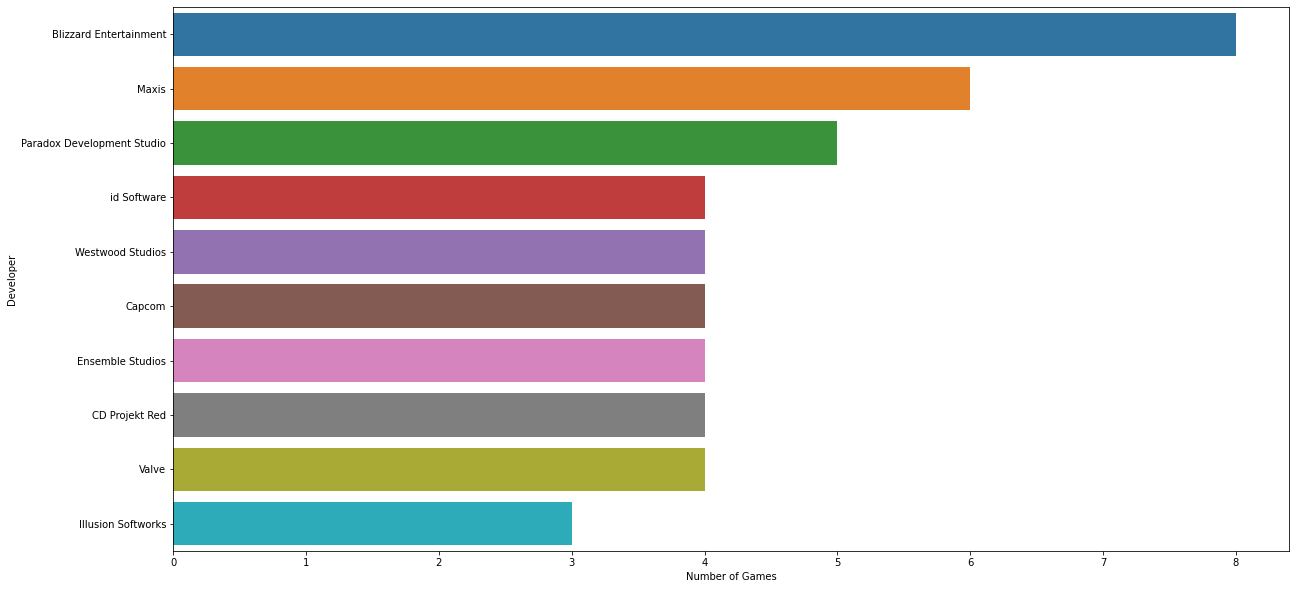

In [54]:
#make the bar chart for top 10 developers

plt.rcParams["figure.figsize"] = (20,10)
numberbydev = sns.barplot('Number of Games','Top Developer',data =dev10)
numberbydev.set_xlabel("Number of Games")
numberbydev.set_ylabel("Developer")

In [55]:
#get the top 10 publishers

val_pub = df['Publisher'].value_counts()
df_pub = pd.DataFrame(val_pub).reset_index().rename(columns={'index':'Top Publisher', 'Publisher':'Number of Games'})
pub10 = df_pub.head(10)
print(pub10)

             Top Publisher  Number of Games
0          Electronic Arts               19
1   Blizzard Entertainment                8
2      Paradox Interactive                7
3               Activision                6
4           GT Interactive                5
5  Gathering of Developers                4
6                Microsoft                4
7                   Capcom                4
8       Virgin Interactive                3
9               CD Projekt                3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Publisher')

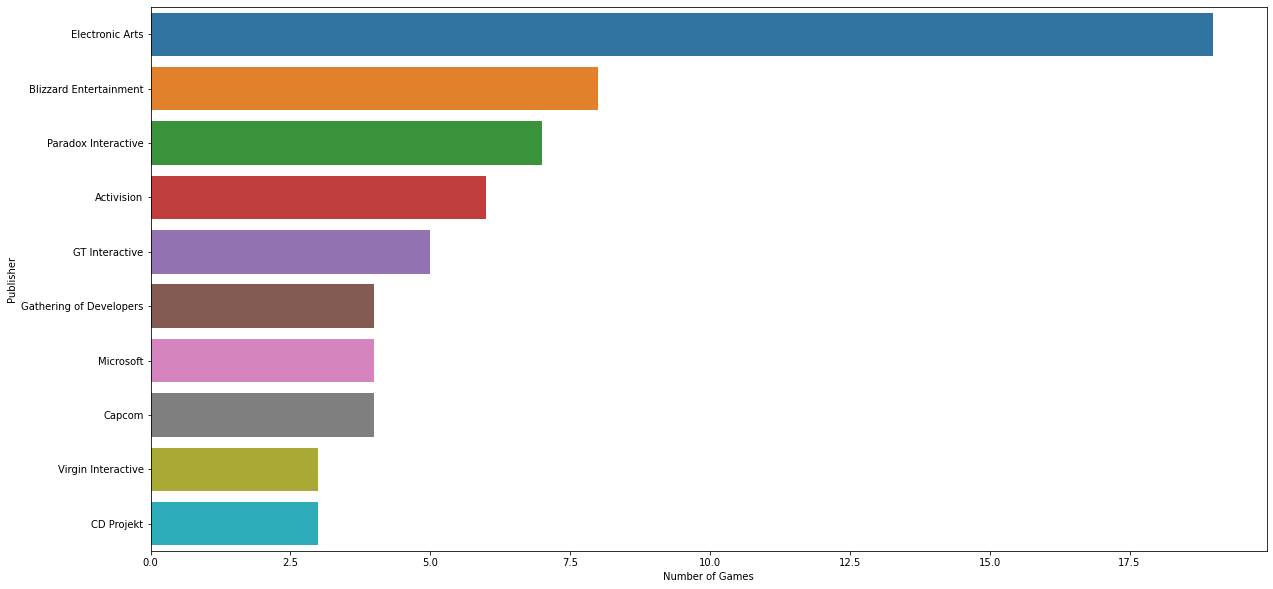

In [56]:
#get the chrat for top 10 developers

plt.rcParams["figure.figsize"] = (20,10)
numberbypub = sns.barplot('Number of Games','Top Publisher',data =pub10)
numberbypub.set_xlabel("Number of Games")
numberbypub.set_ylabel("Publisher")

In [82]:
df

,Name,Sales,Series,Release,Genre,Developer,Publisher,Year,Main Genre
0,PlayerUnknown's Battlegrounds,42.0,No Series Specified,2017-12-01,Battle royale,PUBG Studios,Krafton,2017,Battle royale
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios,2011,Sandbox
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,2012,Action role-playing
3,Garry's Mod,20.0,No Series Specified,2006-11-01,Sandbox,Facepunch Studios,Valve,2006,Sandbox
4,Terraria,17.2,No Series Specified,2011-05-01,Action-adventure,Re-Logic,Re-Logic,2011,Action-adventure
...,...,...,...,...,...,...,...,...,...
170,Vietcong,1.0,Vietcong,2003-03-01,Tactical shooter,Pterodon,Gathering of Developers,2003,Tactical shooter
171,Warhammer Online: Age of Reckoning,1.0,Warhammer,2008-09-01,MMORPG,Mythic Entertainment,Electronic Arts,2008,MMORPG
172,Who Wants to Be a Millionaire?,1.0,No Series Specified,1999-11-01,Trivia game,Jellyvision,Disney Interactive Studios,1999,Trivia game
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,1994-12-01,Space combat simulation,Origin Systems,Electronic Arts,1994,Space combat simulation


In [58]:
#get the total sales for every publishers

#pd.set_option('display.max_rows', None)
df_top_sales_publisher = df.groupby('Publisher', as_index=False).sum('Sales').sort_values(by='Sales', ascending=False)
df_top10_sales_publisher = df_top_sales_publisher.head(10)
df_top10_sales_publisher

,Publisher,Sales
8,Blizzard Entertainment,59.0
28,Electronic Arts,54.0
51,Krafton,42.0
59,Mojang Studios,33.0
89,Valve,20.0
14,CD Projekt,18.5
63,Re-Logic,17.2
90,Valve (digital),14.0
2,Activision,13.5
62,Paradox Interactive,12.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Publisher')

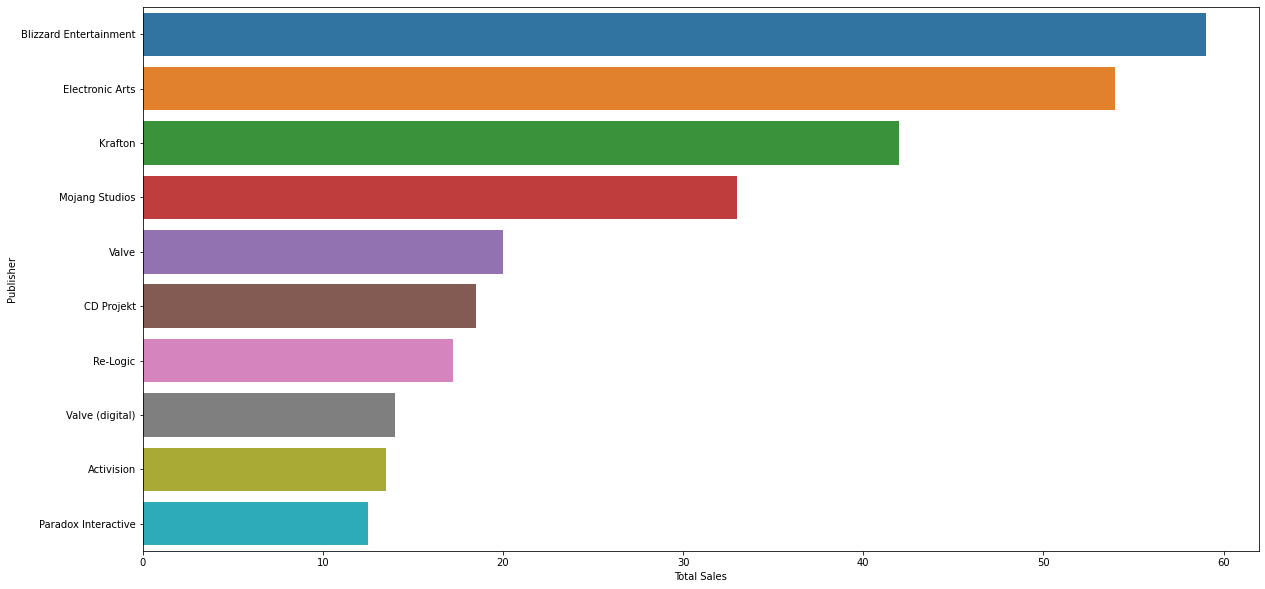

In [59]:
#chart total sales by publishers

plt.rcParams["figure.figsize"] = (20,10)
numberbypub = sns.barplot('Sales','Publisher',data = df_top10_sales_publisher)
numberbypub.set_xlabel("Total Sales")
numberbypub.set_ylabel("Publisher")

In [60]:
#get the total sales for every developer

df_top_sales_developer = df.groupby('Developer', as_index=False).sum('Sales').sort_values(by='Sales', ascending=False)
#df_top_sales_developer
df_top10_sales_developer = df_top_sales_developer.head(10)
df_top10_sales_developer

,Developer,Sales
6,Blizzard Entertainment,58.0
69,PUBG Studios,42.0
65,Mojang Studios,33.0
60,Maxis,33.0
34,Facepunch Studios,29.0
102,Valve,25.0
12,CD Projekt Red,20.5
76,Re-Logic,17.2
35,Firaxis Games,13.0
38,Frontier Developments,12.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Developer')

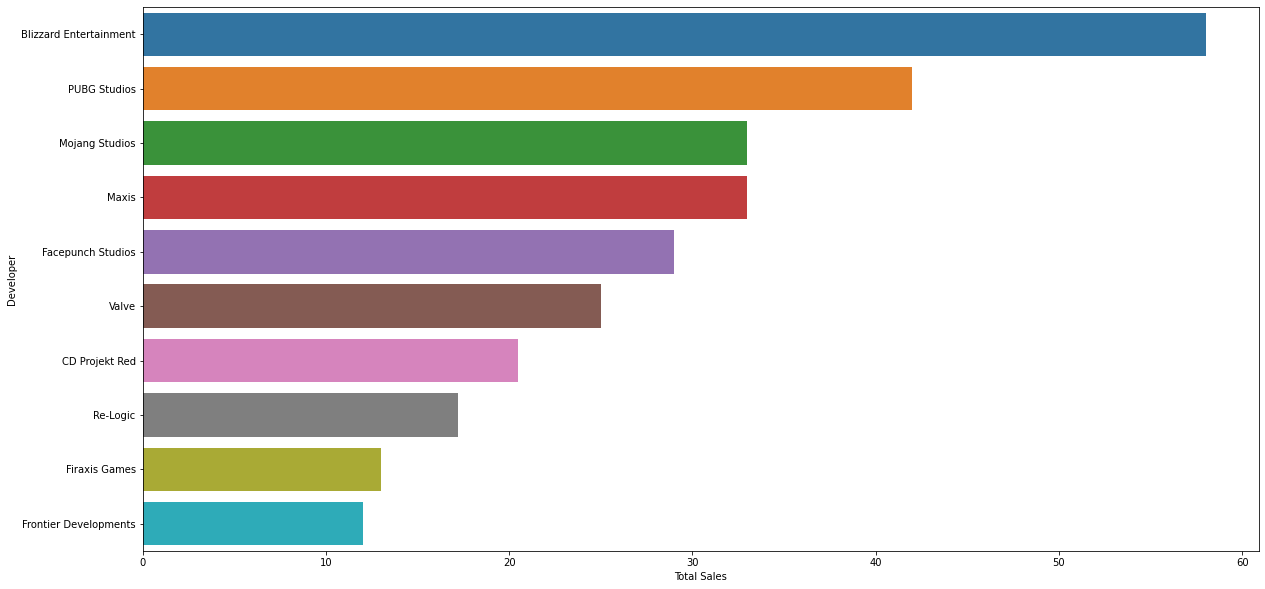

In [61]:
#chart of total sales for every publisher

plt.rcParams["figure.figsize"] = (20,10)
numberbypub = sns.barplot('Sales','Developer',data = df_top10_sales_developer)
numberbypub.set_xlabel("Total Sales")
numberbypub.set_ylabel("Developer")

In [62]:
#take 'Electronic Art' as the example of the publisher

#get every games by 'Electronic Art'

pub_electornic_arts = df.loc[df['Publisher'] == 'Electronic Arts']
pub_electornic_arts.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher,Year,Main Genre
9,The Sims,11.0,The Sims,2000-02-01,Life simulation,Maxis,Electronic Arts,2000,Life simulation
15,The Sims 3,7.0,The Sims,2009-06-01,Life simulation,Maxis,Electronic Arts,2009,Life simulation
19,The Sims 2,6.0,The Sims,2004-09-01,Life simulation,Maxis,Electronic Arts,2004,Life simulation
25,SimCity 3000,5.0,SimCity,1999-01-01,City-building,Maxis,Electronic Arts,1999,City-building
30,Populous,4.0,Populous,1989-06-01,God game,Bullfrog Productions,Electronic Arts,1989,God game


In [63]:
#genre of games by 'Electronic Art'

genre_electrnic_arts = pd.DataFrame(pub_electornic_arts['Main Genre'].value_counts()).reset_index().rename(columns={'index':'Genre', 'Main Genre':'Number of Games'})
print(genre_electrnic_arts)

                                    Genre  Number of Games
0                    First-person shooter                4
1                         Life simulation                3
2                      Real-time strategy                3
3                           City-building                2
4                                God game                2
5                        Action-adventure                2
6  Construction and management simulation                1
7                                  MMORPG                1
8                 Space combat simulation                1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


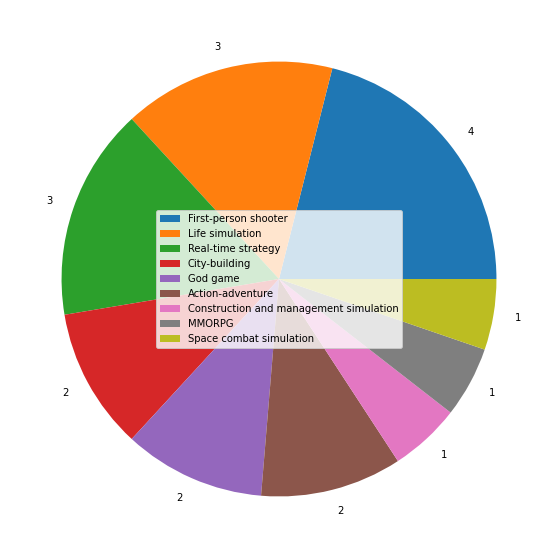

In [64]:
#pie chart of total games of every genre by 'Electronic Art'

plt.pie(np.array([genre_electrnic_arts['Number of Games']]),
        labels=(genre_electrnic_arts['Number of Games'])
        )

plt.legend(genre_electrnic_arts['Genre'],loc='center')
plt.show()

In [65]:
#take 'Maxis' as the example of the developer

#get every games by 'Maxis'

dev_maxis = df.loc[df['Developer'] == 'Maxis']
dev_maxis

,Name,Sales,Series,Release,Genre,Developer,Publisher,Year,Main Genre
9,The Sims,11.0,The Sims,2000-02-01,Life simulation,Maxis,Electronic Arts,2000,Life simulation
15,The Sims 3,7.0,The Sims,2009-06-01,Life simulation,Maxis,Electronic Arts,2009,Life simulation
19,The Sims 2,6.0,The Sims,2004-09-01,Life simulation,Maxis,Electronic Arts,2004,Life simulation
25,SimCity 3000,5.0,SimCity,1999-01-01,City-building,Maxis,Electronic Arts,1999,City-building
77,SimCity 4,2.0,SimCity,2003-01-01,City-building,Maxis,Electronic Arts (Windows),2003,City-building
79,Spore,2.0,Spore,2008-09-01,God game,Maxis,Electronic Arts,2008,God game


In [66]:
#genre of games by 'Electronic Art'

genre_maxis = pd.DataFrame(dev_maxis['Main Genre'].value_counts()).reset_index().rename(columns={'index':'Genre', 'Main Genre':'Number of Games'})
print(genre_maxis)

             Genre  Number of Games
0  Life simulation                3
1    City-building                2
2         God game                1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


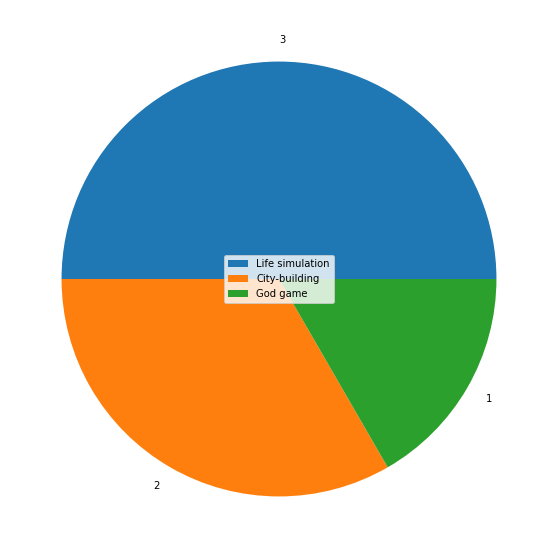

In [67]:
#pie chart of total games of every genre by 'Electronic Art'

plt.pie(np.array([genre_maxis['Number of Games']]),
        labels=(genre_maxis['Number of Games'])
        )

plt.legend(genre_maxis['Genre'],loc='center')
plt.show()

In [68]:
#try to make the heatmap to get the correlation of each columns to others

#first we have to numerize each column, because correlation can onle be done when the column data type is numeric

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
      df_numerized[col_name] = df_numerized[col_name].astype('category')
      df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher,Year,Main Genre
0,106,42.0,51,2017-12-01,12,69,51,28,6
1,95,33.0,47,2011-11-01,45,65,59,22,36
2,50,20.0,22,2012-05-01,1,6,8,23,1
3,67,20.0,51,2006-11-01,44,34,89,17,36
4,144,17.2,51,2011-05-01,4,76,63,22,3


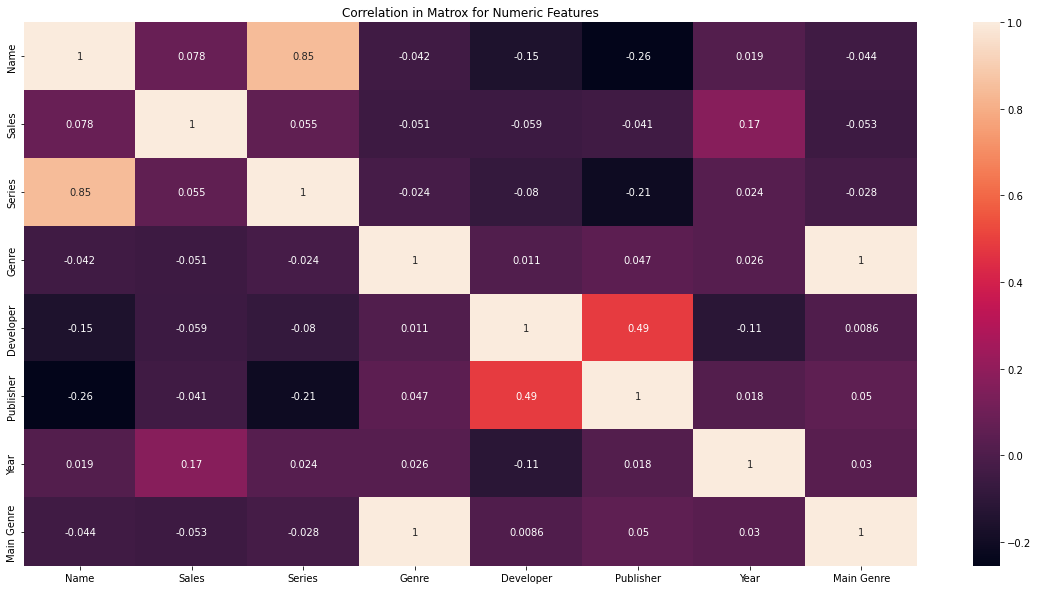

In [69]:
#make the heatmap

#turns out no correlation above 0.5


correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation in Matrox for Numeric Features')

plt.show()